Цель - нанести на карту города

Набор данных содержит информацию из Wiki о нескольких важных городах:
* Координаты (в формате угловые градусы, минуты, секунды)
* Название страны
* Признак столицы (1 - столица, 0 - нет)
* Название города

Обратите внимание, что:
* градусы северной широты - положительные
* градусы южной широты - отрицательные
* градусы восточной долготы - положительные
* градусы западной долготы - отрицательные

Считается, что нулевой меридиан и нулевая параллель пересекаются в центре карты.

Нужно отметить на карте города, согласно их координатам, если их население больше 1.000.000 человек (размер маркера должен быть пропорционален населению).

Столицы отметьте одним маркером (например, звёздочкой), а обычные города другим (например, кружком).

Цвета всех городов одной страны должны совпадать.

Используйте цвета (если вы используете случайную генерацию цвета, то допускается случайная оптическая близость цветов нескольких стран, но старайтесь чтобы их было не больше половины, а так же, чтобы отметки были различимы на карте).

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
with open('for_maps/world.jpg', 'rb') as read_img:
    map_img = plt.imread(read_img)

In [3]:
world_df = pd.read_csv('for_maps/cities.csv')

In [4]:
world_df.head()

,Longitude deg,Longitude min,Longitude sec,Latitude deg,Latitude min,Latitude sec,Population,Country,Capital,Name
0,55,45,21,37,37,4,12506468,Russia,1,Moscow
1,40,43,42,-73,-59,-39,8405837,USA,0,New York
2,38,53,42,-77,-2,-12,601723,USA,1,Washington
3,34,2,0,-118,-16,0,3976322,USA,0,Los Angeles
4,-35,-18,-10,149,8,30,356585,Australia,1,Canberra


In [5]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Longitude deg  13 non-null     int64 
 1   Longitude min  13 non-null     int64 
 2   Longitude sec  13 non-null     int64 
 3   Latitude deg   13 non-null     int64 
 4   Latitude min   13 non-null     int64 
 5   Latitude sec   13 non-null     int64 
 6   Population     13 non-null     int64 
 7   Country        13 non-null     object
 8   Capital        13 non-null     int64 
 9   Name           13 non-null     object
dtypes: int64(8), object(2)
memory usage: 1.1+ KB


## Подготовка датасета

In [6]:
world_df = world_df[world_df.Population >= 1000000]
world_df.index = range(len(world_df))

In [7]:
print("Количество городов: " + str(len(world_df)))

Количество городов: 11


In [8]:
print("Уникальных стран: " + str(len(world_df.Country.unique())))

Уникальных стран: 8


In [9]:
countries = world_df.Country.unique()
color_names = ['w', 'lime', 'yellow', 'red', 'orange', 'black', 'blue', 'cyan']
colors = dict()
for country, color_name in zip(countries, color_names):
    colors[country] = color_name

## Функции

In [10]:
def get_deg(deg, min_, sec):
    return deg + min_/60 + sec/3600

In [11]:
def get_coordinates_on_map(city, map_w, map_h):
    lat_deg = city.get('Longitude deg')
    lat_min = city.get('Longitude min')
    lat_sec = city.get('Longitude sec')
    
    lon_deg = city.get('Latitude deg')
    lon_min = city.get('Latitude min')
    lon_sec = city.get('Latitude sec')
    
    lon_deg_full = get_deg(lon_deg, lon_min, lon_sec)
    lat_deg_full = get_deg(lat_deg, lat_min, lat_sec)
    lat_rad_full = lat_deg_full*np.pi/180
    
    y_coef = np.log(np.tan(np.pi/4 + lat_rad_full/2))
    
    x = (lon_deg_full + 180)*map_w/360
    y = map_h/2 + map_w*y_coef/(2*np.pi)
    
    return x, y

## График

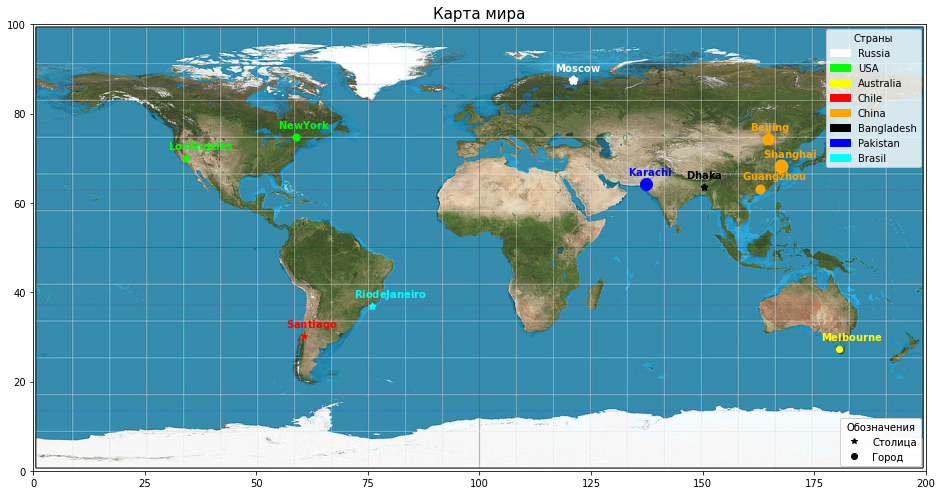

In [32]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('Карта мира', fontsize=15)
map_w = 200
map_h = 100
ax.imshow(map_img, extent=[0, map_w, 0, map_h])

for i in range(len(world_df)):
    for country in world_df.Country.unique():
        
        city = world_df.iloc[i]
        if city.get('Country') == country:
            color = colors[country]
            x, y = get_coordinates_on_map(world_df.iloc[i], map_w, map_h)
            marker = '*' if city.get('Capital') == 1 else 'o'
            pop_size = int(city.get('Population') / 3_000_000)
            ax.scatter(x, y, lw=pop_size, c=color, marker=marker)
            ax.text(x-4, y+2, r'$\bf{' + city.get('Name') + '}$', c=color, fontsize=10, style='italic')

patches_country = []
for country in world_df.Country.unique():
    color = colors[country]
    patches_country.append(mpatches.Patch(color=color, label=country))

patches_markers = []
patches_markers.append(mlines.Line2D([], [], color='k', lw=0, marker="*", label='Столица'))
patches_markers.append(mlines.Line2D([], [], color='k', lw=0, marker="o", label='Город'))

legend1 = plt.legend(handles=patches_country, title='Страны', loc=1)
legend2 = plt.legend(handles=patches_markers, title='Обозначения', loc=4)

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.show()

In [33]:
fig.savefig('maps.svg')